In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set(style="ticks")

In [4]:
path = r"C:\Users\sanja\Downloads\Online_Retail.csv"

online_rt = pd.read_csv(path, encoding='latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


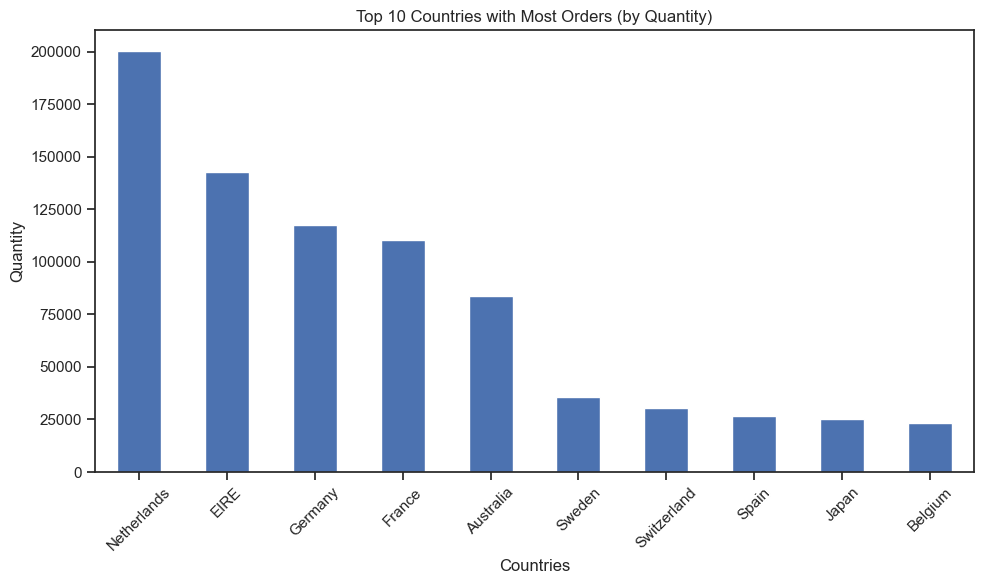

In [5]:
countries = online_rt.groupby("Country").sum(numeric_only=True)
top_countries = countries.sort_values(by="Quantity", ascending=False)[1:11]
top_countries["Quantity"].plot(kind="bar", figsize=(10, 6) )
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.title("Top 10 Countries with Most Orders (by Quantity)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
online_rt = online_rt[online_rt["Quantity"] > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


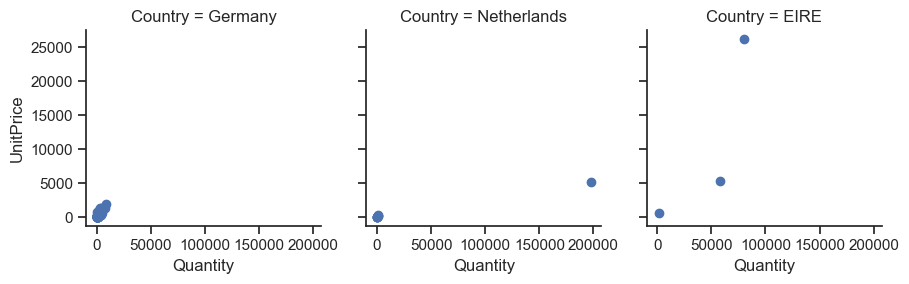

In [7]:
customers = online_rt.groupby(["CustomerID","Country"]).sum()
customers = customers[customers.UnitPrice > 0]
customers["Country"] = customers.index.get_level_values(1)
top_countries = ["Germany", "EIRE", "Netherlands"]
customers = customers[customers['Country'].isin(top_countries)]
g = sns.FacetGrid(customers, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
g.add_legend()

In [8]:
customers = online_rt.groupby(['CustomerID','Country']).sum().head()

In [9]:
customers

,,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice
CustomerID,Country,,,,,,
12346.0,United Kingdom,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04
12347.0,Iceland,5376265376265376265376265376265376265376265376...,8511622375714772249222771227722277322774227752...,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,2458,12/7/10 14:5712/7/10 14:5712/7/10 14:5712/7/10...,481.21
12348.0,Finland,5393185393185393185393185393185393185393185393...,8499222951849918499121213212132261621981219822...,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2341,12/16/10 19:0912/16/10 19:0912/16/10 19:0912/1...,178.71
12349.0,Italy,5776095776095776095776095776095776095776095776...,2311223460215642141121563221312219548194849782...,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,631,11/21/11 9:5111/21/11 9:5111/21/11 9:5111/21/1...,605.10
12350.0,Norway,5430375430375430375430375430375430375430375430...,219082241279066K79191C2234884086C2255122557218...,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,197,2/2/11 16:012/2/11 16:012/2/11 16:012/2/11 16:...,65.30


In [10]:
customers.UnitPrice.dtype

dtype('float64')

In [11]:
 display(online_rt[online_rt.CustomerID == 12347.0].
        sort_values(by='UnitPrice', ascending = False).head())
 display(online_rt[online_rt.CustomerID == 12346.0].
        sort_values(by='UnitPrice', ascending = False).head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
220577,556201,23173,REGENCY TEAPOT ROSES,2,6/9/11 13:01,9.95,12347.0,Iceland


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [22]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)
top3 = sales_volume.index[1:4]  # Exclude UK (assumed at index 0)
print(top3)

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')


In [23]:
 online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
 online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [28]:
# Filter data for top3 countries and group by CustomerID and Country
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID', 'Country'])

# Aggregate Quantity and Revenue
plottable = grouped[['Quantity', 'Revenue']].agg('sum')

# Compute Average Price
plottable['AvgPrice'] = plottable['Revenue'] / plottable['Quantity']

# Extract Country from index into a new column
plottable['Country'] = plottable.index.get_level_values(1)

# Display the first few rows
plottable.head()


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


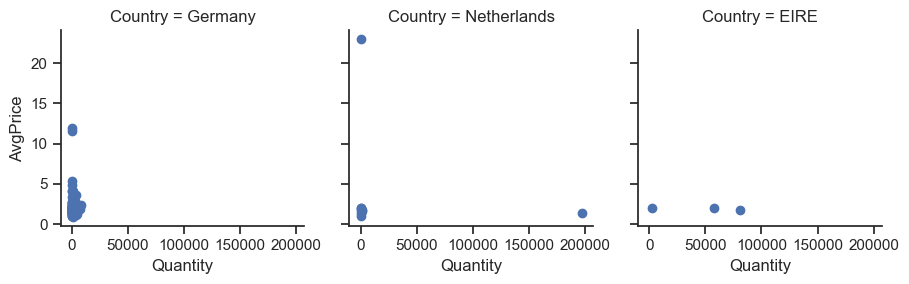

In [30]:
# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")
 # map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)
 # adds legend
g.add_legend();

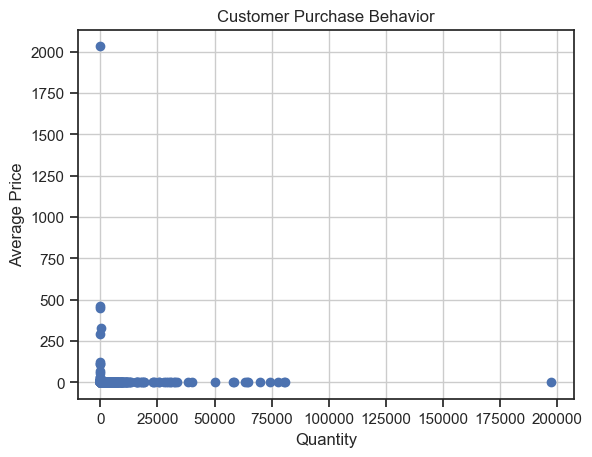

In [33]:
grouped = online_rt.groupby(['CustomerID'])

# Use a list of columns, not a tuple
plottable = grouped[['Quantity', 'Revenue']].agg('sum')

# Calculate Average Price
plottable['AvgPrice'] = plottable['Revenue'] / plottable['Quantity']

# Create scatter plot
import matplotlib.pyplot as plt

plt.scatter(plottable['Quantity'], plottable['AvgPrice'])
plt.xlabel('Quantity')
plt.ylabel('Average Price')
plt.title('Customer Purchase Behavior')
plt.grid(True)
plt.show()




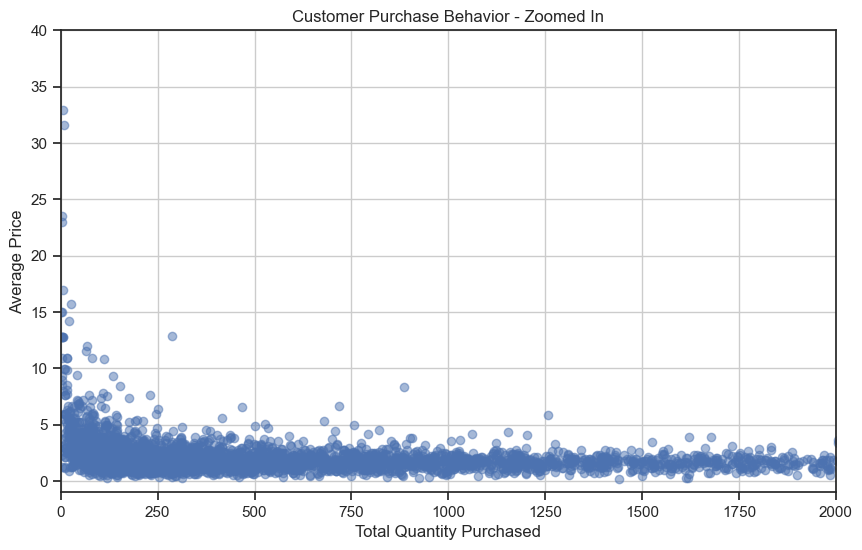

In [34]:
import matplotlib.pyplot as plt

# Group by CustomerID and aggregate Quantity and Revenue
grouped = online_rt.groupby(['CustomerID']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
})

# Calculate average price
grouped['AvgPrice'] = grouped['Revenue'] / grouped['Quantity']

# Scatter plot: Quantity vs. AvgPrice
plt.figure(figsize=(10, 6))
plt.scatter(grouped['Quantity'], grouped['AvgPrice'], alpha=0.5)

# Zoom in (start axes at specified limits)
plt.xlim(0, 2000)
plt.ylim(-1, 40)

# Add labels and title
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Average Price')
plt.title('Customer Purchase Behavior - Zoomed In')
plt.grid(True)

plt.show()


C:\Users\sanja\AppData\Local\Temp\ipykernel_27296\3013531577.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_per_price = online_rt.groupby(


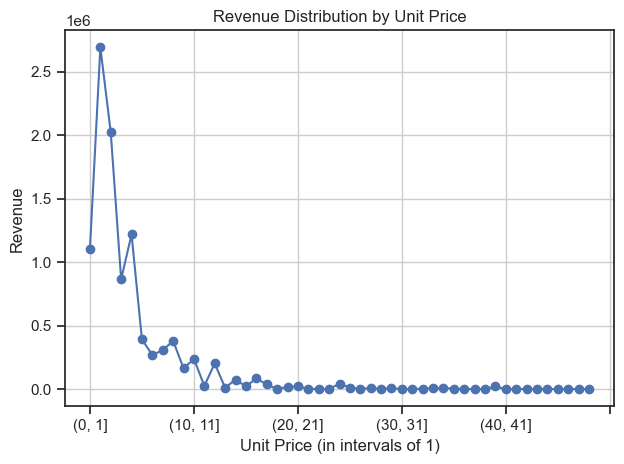

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define bucket parameters
price_start = 0
price_end = 50
price_interval = 1

# Create buckets using np.arange
buckets = np.arange(price_start, price_end, price_interval)

# Group by UnitPrice buckets and sum the revenue
revenue_per_price = online_rt.groupby(
    pd.cut(online_rt['UnitPrice'], buckets)
)['Revenue'].sum()

# Plot the revenue per price bucket
revenue_per_price.plot(kind='line', marker='o')
plt.xlabel(f'Unit Price (in intervals of {price_interval})')
plt.ylabel('Revenue')
plt.title('Revenue Distribution by Unit Price')
plt.grid(True)
plt.tight_layout()
plt.show()


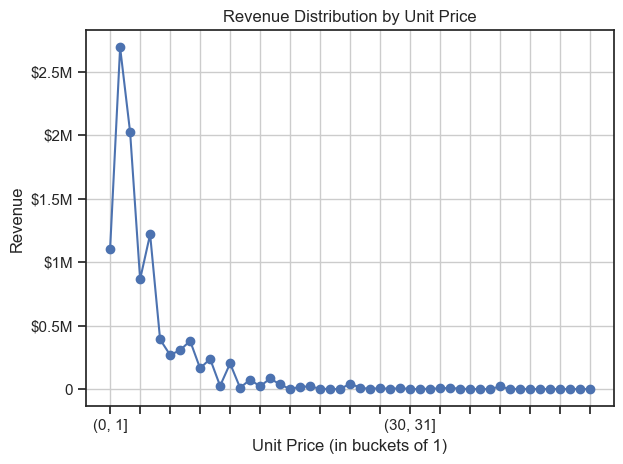

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the revenue per price bucket
revenue_per_price.plot(kind='line', marker='o')

# Axis labels with dynamic interval info
plt.xlabel(f'Unit Price (in buckets of {price_interval})')
plt.ylabel('Revenue')

# Avoid clutter by spacing x-ticks every 3 units
plt.xticks(np.arange(price_start, price_end, 3))

# Set y-ticks and labels for readability
plt.yticks(
    [0, 500000, 1000000, 1500000, 2000000, 2500000],
    ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M']
)

# Optional: Add a title and grid
plt.title('Revenue Distribution by Unit Price')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

